In [1]:
import numpy as np
import torch 

In [2]:
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


### convert numpy array to tensor

In [3]:
# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x1073c6f90>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [4]:
print("Numpy {}\n".format(np.ones((3,3))))

# pytorch ones
print(torch.ones((3,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [5]:
#random numbers
print("Numpy {}\n".format(np.random.rand(3,3)))

# pytorch random
print(torch.rand(3,3))

Numpy [[0.50887163 0.91792417 0.02430554]
 [0.85463677 0.54482937 0.49902278]
 [0.74702531 0.52803424 0.22157042]]

tensor([[0.4063, 0.4692, 0.7765],
        [0.0675, 0.1301, 0.3057],
        [0.9387, 0.9284, 0.3857]])


### to & fro conversions

In [6]:
# Convert NumPy array to PyTorch tensor
from_numpy_to_tensor = torch.from_numpy(np.array(array))
print("From NumPy to Tensor:\n{}\n".format(from_numpy_to_tensor))

# Convert PyTorch tensor back to NumPy array
from_tensor_to_numpy = from_numpy_to_tensor.numpy()
print("From Tensor to NumPy:\n{}\n".format(from_tensor_to_numpy))


From NumPy to Tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])

From Tensor to NumPy:
[[1 2 3]
 [4 5 6]]



In [7]:
import torch      
from torch.autograd import Variable     
import torch.nn as nn 
import warnings

In [8]:
import torchvision

In [9]:
#import sys
#!{sys.executable} -m pip install torchvision

# OLS model with pytorch

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

# Load the data into a pandas dataframe
iris = sns.load_dataset("iris")
iris.head()

X = iris[["petal_length"]] #predictor
y = iris["petal_width"] #response

#Linear regression
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())


X = iris["petal_length"]
X = np.vander(X, 2) # add a constant row for the intercept
y = iris["petal_width"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())



                                 OLS Regression Results                                
Dep. Variable:            petal_width   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              4417.
Date:                Sun, 30 Jun 2024   Prob (F-statistic):                   1.22e-112
Time:                        17:38:13   Log-Likelihood:                         -8.7179
No. Observations:                 150   AIC:                                      19.44
Df Residuals:                     149   BIC:                                      22.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [21]:
# with more than one predictor

X = iris[["petal_length","sepal_length"]] #predictors
y = iris["petal_width"]
 #with catagorical variables

dummies = pd.get_dummies(iris["species"])
# Add to the original dataframe
iris = pd.concat([iris, dummies], axis=1)#assign numerical values to the different species
iris.head() 

X = iris[["petal_length","sepal_length", "setosa", "versicolor", "virginica"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
X = np.asarray(X)

y = iris["petal_width"]
y = np.asarray(y)

In [23]:
X

array([[1.0, 1.4, 5.1, ..., False, False, False],
       [1.0, 1.4, 4.9, ..., False, False, False],
       [1.0, 1.3, 4.7, ..., False, False, False],
       ...,
       [1.0, 5.2, 6.5, ..., True, True, True],
       [1.0, 5.4, 6.2, ..., True, True, True],
       [1.0, 5.1, 5.9, ..., True, True, True]], dtype=object)

In [24]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [25]:
# Fit the linear model using sklearn
#from sklearn import linear_model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

0.3376683161818044 [ 0.          0.23192122 -0.00169337 -0.10556503 -0.10556503 -0.10556503
 -0.10556503  0.00259978  0.00259978  0.00259978  0.00259978  0.10296525
  0.10296525  0.10296525  0.10296525]


In [26]:
from torch.autograd import Variable
import torch

In [28]:
!pwd

/Users/nbhadra/Documents/Udemy_courses/PyTorch code


In [29]:
cat=pd.read_csv("/Users/nbhadra/Documents/Udemy_courses/PyTorch code/section4/catsM.csv")

In [30]:
cat.head()

Sex  Bwt   Hwt
0   M  2.0   6.5
1   M  2.0   6.5
2   M  2.1  10.1
3   M  2.2   7.2
4   M  2.2   7.6

In [31]:
cat2=cat[['Bwt','Hwt']]

In [32]:
x=cat2.iloc[:,0] ## isolate the first column
x.head()

0    2.0
1    2.0
2    2.1
3    2.2
4    2.2
Name: Bwt, dtype: float64

In [33]:
#convert pandas column to tensor
x=cat2.iloc[:,0].values
print(type(x))

<class 'numpy.ndarray'>


In [34]:
y=cat2.iloc[:,1].values #convert the values of the 2nd column to np

In [35]:
x_np = np.array(x, dtype=np.float32)
x_np = x_np.reshape(-1,1)
x_tensor = Variable(torch.from_numpy(x_np))

In [36]:
y_np = np.array(y, dtype=np.float32)
y_np = y_np.reshape(-1,1)
y_tensor = Variable(torch.from_numpy(y_np))

In [37]:
#setting up OLS model
import torch.nn as nn

In [38]:
# create class

class LinearRegression(nn.Module):
    
    def __init__(self, input_size, output_size):
        
        # super function
        # it inherits from nn.Module
        # and we can accces everything in nn.Module
        super(LinearRegression, self).__init__()
        
        # linear function
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
    


In [39]:
# define model

input_dim = 1 #response variable
output_dim = 1 #predictor

model = LinearRegression(input_dim, output_dim)

#  calculating the mean squared error loss
mse = nn.MSELoss()

# optimization
learning_rate = 0.02 ##alpha
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# train model
loss_list = []
iteration = 1000

for it in range(iteration):
    
    #optimization step
    optimizer.zero_grad()
    
    # forward pass
    result = model(x_tensor)
    
    # calculate loss
    loss = mse(result, y_tensor)
    
    # backward propagation
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    # appending the loss in a list
    loss_list.append(loss.data)
    
    # printing the loss every 100th iteration
    if (it%200 == 0):
        print("epoch: {} ==> loss: {}\n".format(it,loss.data))

epoch: 0 ==> loss: 171.18081665039062

epoch: 200 ==> loss: 2.478699207305908

epoch: 400 ==> loss: 2.4469501972198486

epoch: 600 ==> loss: 2.4248104095458984

epoch: 800 ==> loss: 2.409372091293335



In [40]:
import matplotlib.pyplot as plt


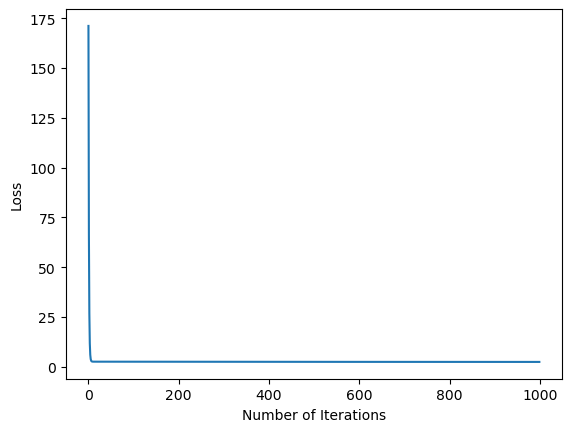

In [41]:
plt.plot(range(iteration), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

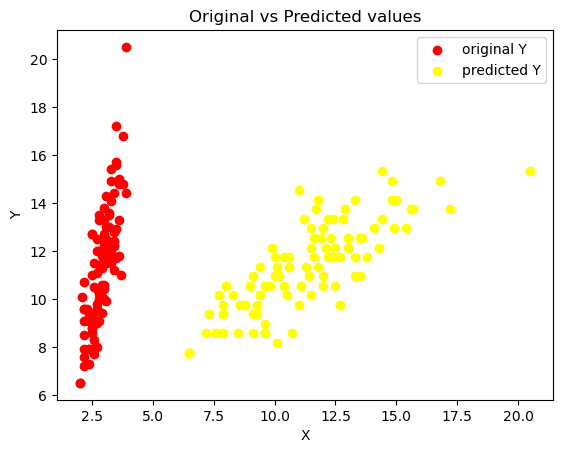

In [42]:
predicted = model(x_tensor).data.numpy()

plt.scatter(x_np, y_np, label="original Y", color="red")
plt.scatter(y_np, predicted, label="predicted Y", color="yellow")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Original vs Predicted values")
plt.show()
plt.show()

# with MNIST dataset

In [43]:
import torchvision.transforms as transforms
import torchvision.datasets as dsets ##in-built datasets


In [48]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)



In [49]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

In [50]:
batch_size = 100
n_iters = 3000
epochs = n_iters / (len(train_dataset) / batch_size)
input_dim = 784
output_dim = 10 ## we have 10 response va classes (0 tp 9)
lr_rate = 0.001

In [51]:
model = LogisticRegression(input_dim, output_dim)

In [53]:
criterion = torch.nn.CrossEntropyLoss() 
# computes softmax and then the cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

In [54]:
iter = 0
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter+=1
        if iter%500==0:
            # calculate Accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total+= labels.size(0)
                # for gpu, bring the predicted and labels back to cpu fro python operations to work
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct/total
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.2188575267791748. Accuracy: 77.36000061035156.
Iteration: 1000. Loss: 0.8573969602584839. Accuracy: 82.9000015258789.
Iteration: 1500. Loss: 0.6778571009635925. Accuracy: 84.8499984741211.
Iteration: 2000. Loss: 0.6335352659225464. Accuracy: 85.91999816894531.
Iteration: 2500. Loss: 0.6242995262145996. Accuracy: 86.79000091552734.
Iteration: 3000. Loss: 0.5023489594459534. Accuracy: 87.12999725341797.
Iteration: 3500. Loss: 0.46114587783813477. Accuracy: 87.6500015258789.
Iteration: 4000. Loss: 0.51851886510849. Accuracy: 87.93000030517578.
Iteration: 4500. Loss: 0.4070751667022705. Accuracy: 88.18000030517578.


# ANN model with pytorch 

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define a simple ANN
class SimpleANN(nn.Module):
    def __init__(self):
        super(SimpleANN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Initialize the network, loss function, and optimizer
net = SimpleANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Training loop
for epoch in range(5):  # 5 epochs
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}')

# Evaluation
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy: {100 * correct / total}%')


Epoch 1, Loss: 0.45169258436986376
Epoch 2, Loss: 0.18342817374574605
Epoch 3, Loss: 0.13145258375453447
Epoch 4, Loss: 0.10705984824164304
Epoch 5, Loss: 0.0886945541514191
Accuracy: 96.67%


# DNN model with pytorch with MNIST dataset

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define a deep neural network
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        return x

# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Initialize the network, loss function, and optimizer
net = DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}')

# Evaluation
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy: {100 * correct / total:.2f}%')


Epoch 1/5, Loss: 0.4626
Epoch 2/5, Loss: 0.2214
Epoch 3/5, Loss: 0.1839
Epoch 4/5, Loss: 0.1596
Epoch 5/5, Loss: 0.1437
Accuracy: 96.09%


# Deep Learning model with creditcard datset

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import torch.nn.functional as F
import torch
from torch import optim
import torch
import torch.nn as nn

In [58]:
#import the dataset
iris = pd.read_csv("./section5/creditcard.csv")
iris.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [59]:
X= iris.iloc[:, 1:29]
Y= iris.iloc[:, 30]
from sklearn.preprocessing import normalize
X = normalize(X)
y = np.array(Y)
y = y.astype(int)

X_train,X_test,Y_train,Y_test= train_test_split(X, y, test_size= 0.10, random_state= 1)
print ('X_train shape: ',X_train.shape)
print ('y_train shape: ',Y_train.shape)
print ('X_test shape: ',X_test.shape)
print ('y_test shape: ',Y_test.shape)

X_train shape:  (256326, 28)
y_train shape:  (256326,)
X_test shape:  (28481, 28)
y_test shape:  (28481,)


In [60]:
trainloader = DataLoader(TensorDataset(torch.from_numpy(X_train), torch.from_numpy(Y_train)),
                         batch_size=len(X_train), shuffle=True)
testloader = DataLoader(TensorDataset(torch.from_numpy(X_test), torch.from_numpy(Y_test)),
                         batch_size=len(X_test), shuffle=False)

dataloaders = {
    "train": trainloader,
    "validation": testloader
}

In [61]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28, 340)
        self.fc2 = nn.Linear(340, 220)
        self.fc3 = nn.Linear(220, 200)
        self.fc4 = nn.Linear(200, 70)
        self.fc5 = nn.Linear(70, 10)
        self.fc6 = nn.Linear(10, 2)
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        #x = x.view(x.shape[0], -1)
        #print(x)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        x = F.relu(self.fc4(x))
        x = self.dropout(F.relu(self.fc5(x)))
        x = F.log_softmax(self.fc6(x), dim=1)
        
        #x = F.log_softmax(self.fc4(x))
        return x

In [62]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [63]:
model

Classifier(
  (fc1): Linear(in_features=28, out_features=340, bias=True)
  (fc2): Linear(in_features=340, out_features=220, bias=True)
  (fc3): Linear(in_features=220, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=70, bias=True)
  (fc5): Linear(in_features=70, out_features=10, bias=True)
  (fc6): Linear(in_features=10, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [64]:
def predict(model, inputs):
    output = model(inputs)
    return output.data.numpy().argmax(axis= 1)

In [65]:
from torch.autograd import Variable

loss1=[]
train_acc=[]

Epoch=40

for epoch in range(Epoch):
    print('------------------------------------------------------------------------------------------')
    acc=0
    train_acc1=0
    
    for i, (features, labels) in enumerate(trainloader):
        #print(features.shape)

        features = Variable(features)

        labels = Variable(labels)

        

        optimizer.zero_grad()

        features=features.float()

        outputs = model(features)

        

        loss = criterion(outputs, labels.long())

        loss.backward()

        optimizer.step()

        if (i+1) % len(trainloader) == 0:
            Ypred = predict(model, torch.from_numpy(X_train).float())
            acc = np.mean(Y_train == Ypred)
#             train_acc1=train_accuracy/len(trainloader)

            train_acc1=acc/len(trainloader)
            train_acc.append(train_acc1)
            loss1.append(loss.data)

            print ('Epoch [%d/%d], Iter [%d] Loss: %.4f Training Accuracy: %.5f' %(epoch+1, 40, i+1, loss.data, train_acc1 ))


------------------------------------------------------------------------------------------
Epoch [1/40], Iter [1] Loss: 0.5176 Training Accuracy: 0.99827
------------------------------------------------------------------------------------------
Epoch [2/40], Iter [1] Loss: 0.4896 Training Accuracy: 0.99827
------------------------------------------------------------------------------------------
Epoch [3/40], Iter [1] Loss: 0.3693 Training Accuracy: 0.99827
------------------------------------------------------------------------------------------
Epoch [4/40], Iter [1] Loss: 0.1651 Training Accuracy: 0.99827
------------------------------------------------------------------------------------------
Epoch [5/40], Iter [1] Loss: 0.0456 Training Accuracy: 0.99827
------------------------------------------------------------------------------------------
Epoch [6/40], Iter [1] Loss: 0.0264 Training Accuracy: 0.99827
----------------------------------------------------------------------------

## ANN 

In [72]:
import torch
import os

import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

In [73]:
!pwd

/Users/nbhadra/Documents/Udemy_courses/PyTorch code


In [74]:
from torchvision import datasets, transforms
# Specify the correct path to your dataset
dataset_root = '/Users/nbhadra/Documents/Udemy_courses/PyTorch code/section6//fruits360/Training/'

# Verify if the path exists
if not os.path.exists(dataset_root):
    raise FileNotFoundError(f"The directory {dataset_root} does not exist. Please check the path.")

#dataset_path=datasets.ImageFolder(root='/fruits360/Training/', transform=transforms.Compose([transforms.ToTensor()]))

In [75]:
# Define the transformation
transform = transforms.Compose([transforms.ToTensor()])

# Load the dataset
dataset = datasets.ImageFolder(root=dataset_root, transform=transform)

print(f"Number of samples in the dataset: {len(dataset)}")

Number of samples in the dataset: 8166


In [78]:
from torch.utils.data.sampler import SubsetRandomSampler

split = int(0.8 * len(dataset))
index_list = list(range(len(dataset)))
np.random.shuffle(index_list)
train_idx, test_idx = index_list[:split], index_list[split:] ## Traing and testing indexes.


## create sampler objects using SubsetRandomSampler
tr_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
## create iterator objects for train and test datasets
train_loader = torch.utils.data.DataLoader(dataset, batch_size=256, sampler=tr_sampler)


test_loader = torch.utils.data.DataLoader(dataset, batch_size=256, sampler=test_sampler)

print ("Total Number of Examples: ",len(dataset))
print ("Number of training Examples: ",len(tr_sampler))
print ("Number of testing Examples: ",len(test_sampler))

Total Number of Examples:  8166
Number of training Examples:  6532
Number of testing Examples:  1634


In [79]:
Classes_num=len(train_loader.dataset.classes)
print ('Number of Classes',Classes_num)
print('Classes Name: ', train_loader.dataset.classes)

Number of Classes 15
Classes Name:  ['Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tangelo', 'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Maroon', 'Walnut']


In [82]:
# Function to unnormalize and show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
#data_iter = iter(train_loader)
#images, labels = next(data_iter)

# Show images
#imshow(torchvision.utils.make_grid(images))

In [84]:
from torch import nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(100 * 100*3, 128)
        self.output = nn.Linear(128, Classes_num)
    def forward(self, x):
        x = self.hidden(x)
        x = F.sigmoid(x)
        x = self.output(x)
        return x
model = Model()
print(model)

from torch import optim
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay= 1e-6, momentum = 0.9, nesterov = True)
# create a loss function

Model(
  (hidden): Linear(in_features=30000, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=15, bias=True)
)


In [85]:
# run the main training loop
loss_array=[]
epochs=50
for epoch in range(1,epochs):
    
    for batch_idx, (data, target) in enumerate(train_loader):
        
        data, target = Variable(data), Variable(target)
        
        # resize data from (batch_size, 100, 100, 3) to (batch_size, 100*100*3)
        data = data.view(-1, 100*100*3)
        #In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch
        optimizer.zero_grad()## accumulates the gradients on subsequent backward passes.
        
        ## 1. forward propagation
        model_out = model(data)
        
        ## 2. loss calculation
        loss = loss_function(model_out, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        loss_array.append(loss.item())
        if batch_idx % len(train_loader)-1 == 0:
            
            print('Epoch: ',epoch,'Loss: ', loss.item())

Epoch:  1 Loss:  2.6990411281585693
Epoch:  2 Loss:  1.8534207344055176
Epoch:  3 Loss:  1.155340552330017
Epoch:  4 Loss:  0.7821021676063538
Epoch:  5 Loss:  0.5627705454826355
Epoch:  6 Loss:  0.39137953519821167
Epoch:  7 Loss:  0.3098156154155731
Epoch:  8 Loss:  0.26878538727760315
Epoch:  9 Loss:  0.23496113717556
Epoch:  10 Loss:  0.17825545370578766
Epoch:  11 Loss:  0.1622178554534912
Epoch:  12 Loss:  0.1391325742006302
Epoch:  13 Loss:  0.10649242997169495
Epoch:  14 Loss:  0.11714166402816772
Epoch:  15 Loss:  0.08589362353086472
Epoch:  16 Loss:  0.09710623323917389
Epoch:  17 Loss:  0.077346071600914
Epoch:  18 Loss:  0.07355821132659912
Epoch:  19 Loss:  0.06168234720826149
Epoch:  20 Loss:  0.06485947221517563
Epoch:  21 Loss:  0.053611431270837784
Epoch:  22 Loss:  0.059541117399930954
Epoch:  23 Loss:  0.04774530977010727
Epoch:  24 Loss:  0.044985391199588776
Epoch:  25 Loss:  0.04308955371379852
Epoch:  26 Loss:  0.03809047117829323
Epoch:  27 Loss:  0.044271677732

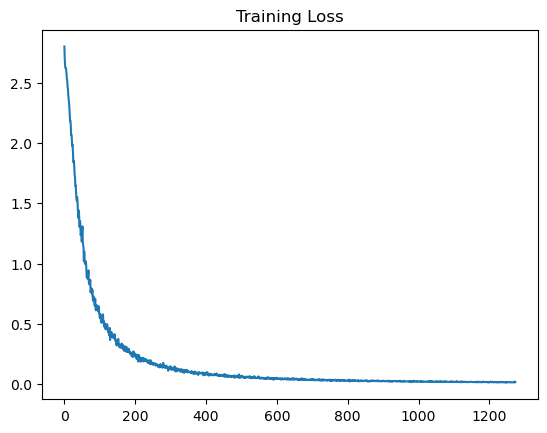

In [86]:
%matplotlib inline
plt.plot(loss_array)
plt.title("Training Loss")
plt.show()

In [87]:
## dataloader for test dataset 
dataiter = iter(test_loader)
data, labels = dataiter.next()
data, target = Variable(data), Variable(target)
data_ = data.view(-1, 100*100*3)

output = model(data_)
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy())
print ("Actual:   ", np.array(labels[:10]))
print ("Predicted:", preds[:10])

TypeError: 'int' object is not callable

In [88]:
# run a test loop
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data), Variable(target)
    data = data.view(-1, 100*100*3)
    net_out = model(data)
    # sum up batch loss
    
    test_loss += loss_function(net_out, target).item()
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)

print('Average loss: ',test_loss)
print('Accuracy: ',np.array(100. * correct / len(test_sampler)),'%')
print ('Total Test Examples: ',len(test_sampler))
print ('Correct predicted Examples: ',int(correct))


Average loss:  1.4397857983067664e-05
Accuracy:  100.0 %
Total Test Examples:  1634
Correct predicted Examples:  1634


## with Deep learning model 

In [89]:
from torch import nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(100 * 100*3, 200)
        self.fc2 = nn.Linear(200, 200) ## 2 hidden layers with 200 neurons each
        self.fc3 = nn.Linear(200, Classes_num)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x)

model = Model()
print(model)

Model(
  (fc1): Linear(in_features=30000, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=15, bias=True)
)


In [90]:
from torch import optim
# create a stochastic gradient descent optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay= 1e-6, momentum=0.9,nesterov = True)
# create a loss function
criterion = nn.NLLLoss()

In [91]:
# run the main training loop
loss_array=[]
epochs=50
for epoch in range(1,epochs):
    
    for batch_idx, (data, target) in enumerate(train_loader):
        
        data, target = Variable(data), Variable(target)
        
        # resize data from (batch_size, 100, 100, 3) to (batch_size, 100*100*3)
        data = data.view(-1, 100*100*3)
        #In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch
        optimizer.zero_grad()## accumulates the gradients on subsequent backward passes.
        
        ## 1. forward propagation
        model_out = model(data)
        
        ## 2. loss calculation
        loss = criterion(model_out, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        loss_array.append(loss.item())
        if batch_idx % len(train_loader)-1 == 0:
            
            print('Epoch: ',epoch,'Loss: ', loss.item())

Epoch:  1 Loss:  2.688638687133789
Epoch:  2 Loss:  0.8510241508483887
Epoch:  3 Loss:  0.1610885113477707
Epoch:  4 Loss:  0.08044566959142685
Epoch:  5 Loss:  0.056989654898643494
Epoch:  6 Loss:  0.032610319554805756
Epoch:  7 Loss:  0.022398099303245544
Epoch:  8 Loss:  0.01341623067855835
Epoch:  9 Loss:  0.008975966833531857
Epoch:  10 Loss:  0.013101247139275074
Epoch:  11 Loss:  0.009896804578602314
Epoch:  12 Loss:  0.006051973439753056
Epoch:  13 Loss:  0.006192523054778576
Epoch:  14 Loss:  0.004107292275875807
Epoch:  15 Loss:  0.004434645641595125
Epoch:  16 Loss:  0.003918493632227182
Epoch:  17 Loss:  0.003033175365999341
Epoch:  18 Loss:  0.0033893627114593983
Epoch:  19 Loss:  0.0023706606589257717
Epoch:  20 Loss:  0.0030259140767157078
Epoch:  21 Loss:  0.002650798764079809
Epoch:  22 Loss:  0.0023534446954727173
Epoch:  23 Loss:  0.002664277097210288
Epoch:  24 Loss:  0.002062448300421238
Epoch:  25 Loss:  0.002504515927284956
Epoch:  26 Loss:  0.0012019469868391752

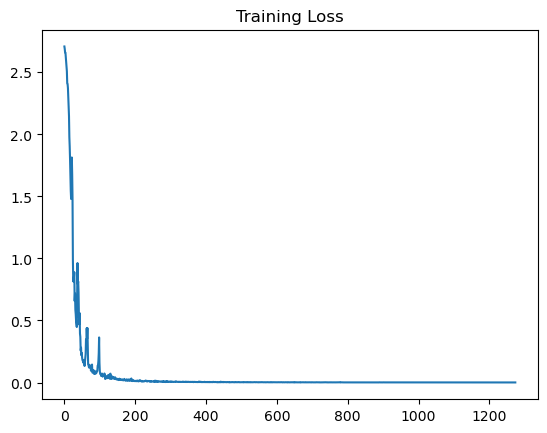

In [92]:
%matplotlib inline
plt.plot(loss_array)
plt.title("Training Loss")
plt.show()

In [93]:
## dataloader for test dataset 
dataiter = iter(test_loader)
data, labels = dataiter.next()
data, target = Variable(data), Variable(target)
data_ = data.view(-1, 100*100*3)

output = model(data_)
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy())
print ("Actual:   ", np.array(labels[:10]))
print ("Predicted:", preds[:10])

TypeError: 'int' object is not callable

In [94]:
# run a test loop
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data), Variable(target)
    data = data.view(-1, 100*100*3)
    model_out = model(data)
    # sum up batch loss
    
    test_loss += criterion(model_out, target).item()
    pred = model_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)

print('Average loss: ',test_loss)
print('Accuracy: ',np.array(100. * correct / len(test_sampler)),'%')
print ('Total Test Examples: ',len(test_sampler))
print ('Correct predicted Examples: ',int(correct))


Average loss:  8.062307757993568e-07
Accuracy:  100.0 %
Total Test Examples:  1634
Correct predicted Examples:  1634


# With convolution neural Network Model

In [95]:
import torch.nn.functional as F
import torch.nn as nn

class Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=9, stride=1, padding=0)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=8, kernel_size=7, stride=1, padding=0)
        
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding=0)
        
        self.fc1 = nn.Linear(8*8*16, 300)
        self.fc2 = nn.Linear(300, Classes_num)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        
        x = x.view(-1, 8*8*16)
        
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

In [96]:
model = Model()
print(model)

Model(
  (conv1): Conv2d(3, 6, kernel_size=(9, 9), stride=(1, 1))
  (conv2): Conv2d(6, 8, kernel_size=(7, 7), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=15, bias=True)
)


In [97]:
import torch.optim as optim
# create a loss function
criterion = nn.CrossEntropyLoss()
# create a stochastic gradient descent optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [98]:
# run the main training loop
loss_array=[]
epochs=30
for epoch in range(1,epochs):
    
    for batch_idx, (data, target) in enumerate(train_loader):
        
        data, target = Variable(data), Variable(target)
        
        #In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch
        optimizer.zero_grad()## accumulates the gradients on subsequent backward passes.
        
        ## 1. forward propagation
        model_out = model(data)
        
        ## 2. loss calculation
        loss = criterion(model_out, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        loss_array.append(loss.item())
        
        if batch_idx % len(train_loader)-1 == 0:
            
            print('Epoch: ',epoch,'Loss: ', loss.item())

Epoch:  1 Loss:  2.7122349739074707
Epoch:  2 Loss:  2.684892177581787
Epoch:  3 Loss:  2.5184550285339355
Epoch:  4 Loss:  1.5017410516738892
Epoch:  5 Loss:  0.5916147828102112
Epoch:  6 Loss:  0.300760954618454
Epoch:  7 Loss:  0.1896311193704605
Epoch:  8 Loss:  0.13879692554473877
Epoch:  9 Loss:  0.10023588687181473
Epoch:  10 Loss:  0.0657515823841095
Epoch:  11 Loss:  0.05795701593160629
Epoch:  12 Loss:  0.05746357887983322
Epoch:  13 Loss:  0.06589159369468689
Epoch:  14 Loss:  0.04053761437535286
Epoch:  15 Loss:  0.052639786154031754
Epoch:  16 Loss:  0.04515758901834488
Epoch:  17 Loss:  0.024306446313858032
Epoch:  18 Loss:  0.024324096739292145
Epoch:  19 Loss:  0.05313989147543907
Epoch:  20 Loss:  0.0206970926374197
Epoch:  21 Loss:  0.018858397379517555
Epoch:  22 Loss:  0.013059134595096111
Epoch:  23 Loss:  0.010490207001566887
Epoch:  24 Loss:  0.024625174701213837
Epoch:  25 Loss:  0.016818946227431297
Epoch:  26 Loss:  0.010842184536159039
Epoch:  27 Loss:  0.012

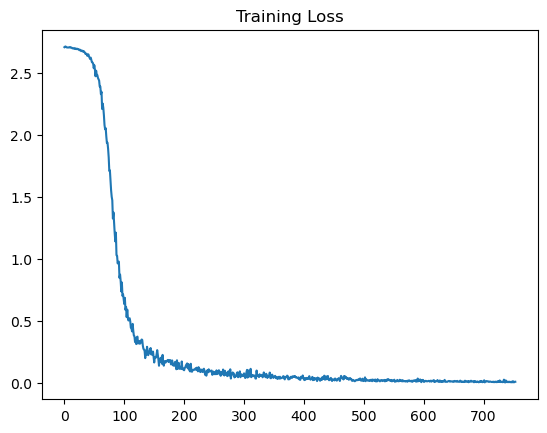

In [99]:
%matplotlib inline
plt.plot(loss_array)
plt.title("Training Loss")
plt.show()

In [100]:
## dataloader for test dataset 
dataiter = iter(test_loader)
data, labels = dataiter.next()
data, target = Variable(data), Variable(target)

output = model(data)
_, preds_tensor = torch.max(output, 1)
preds_tensor=preds_tensor.cpu()
preds = np.squeeze(preds_tensor.numpy())
print ("Actual:   ", np.array(labels[:10]))
print ("Predicted:", preds[:10])

TypeError: 'int' object is not callable

In [101]:
# run a test loop
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data), Variable(target)
    
    model_out = model(data)
    # sum up batch loss
    
    test_loss += criterion(model_out, target).item()
    pred = model_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)

print('Average loss: ',test_loss)
print('Accuracy: ',np.array(100. * correct / len(test_sampler)),'%')
print ('Total Test Examples: ',len(test_sampler))
print ('Correct predicted Examples: ',int(correct))


Average loss:  6.827609563356313e-06
Accuracy:  99.9388 %
Total Test Examples:  1634
Correct predicted Examples:  1633


# Convolutional Neural Network (Resnet-34)

In [102]:
import torchvision.models as models
model = models.resnet34(num_classes=Classes_num)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [103]:
import torch.optim as optim
import torch.nn as nn
# create a loss function
criterion = nn.CrossEntropyLoss()
# create a stochastic gradient descent optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [104]:
# run the main training loop
loss_array=[]
epochs=10
for epoch in range(1,epochs):
    
    for batch_idx, (data, target) in enumerate(train_loader):
        
        data, target = Variable(data), Variable(target)
        
        #In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch
        optimizer.zero_grad()## accumulates the gradients on subsequent backward passes.
        
        
        ## 1. forward propagation
        model_out = model(data)
        
        ## 2. loss calculation
        loss = criterion(model_out, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        loss_array.append(loss.item())
        
        if batch_idx % len(train_loader)-1 == 0:
            
            print('Epoch: ',epoch,'Loss: ', loss.item())

Epoch:  1 Loss:  2.8706307411193848
Epoch:  2 Loss:  1.7952003479003906
Epoch:  3 Loss:  1.1061187982559204
Epoch:  4 Loss:  0.5245673656463623
Epoch:  5 Loss:  0.260479211807251
Epoch:  6 Loss:  0.1411939114332199
Epoch:  7 Loss:  0.08433733135461807
Epoch:  8 Loss:  0.05365878716111183
Epoch:  9 Loss:  0.035451579838991165


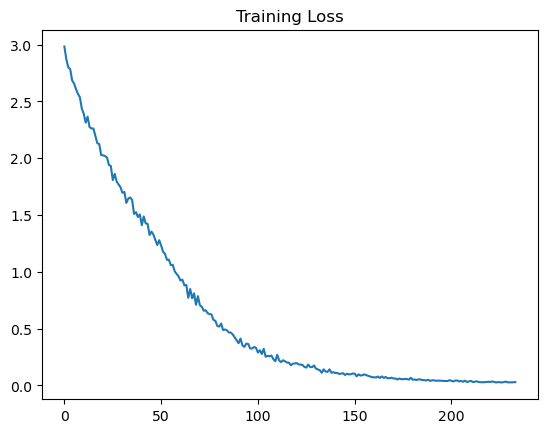

In [105]:
%matplotlib inline
plt.plot(loss_array)
plt.title("Training Loss")
plt.show()

In [ ]:
## dataloader for test dataset 
dataiter = iter(test_loader)
data, labels = dataiter.next()
data, target = Variable(data), Variable(target)


output = model(data)
_, preds_tensor = torch.max(output, 1)
preds_tensor=preds_tensor.cpu()
preds = np.squeeze(preds_tensor.numpy())
print ("Actual:   ", np.array(labels[:10]))
print ("Predicted:", preds[:10])

In [106]:
# run a test loop
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data), Variable(target)
    
    model_out = model(data)
    # sum up batch loss
    
    test_loss += criterion(model_out, target).item()
    pred = model_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)

print('Average loss: ',test_loss)
print('Accuracy: ',np.array(100. * correct / len(test_sampler)),'%')
print ('Total Test Examples: ',len(test_sampler))
print ('Correct predicted Examples: ',int(correct))


Average loss:  3.229046138717414e-05
Accuracy:  99.9388 %
Total Test Examples:  1634
Correct predicted Examples:  1633
